In [4]:
!pip install pytorch-tabnet
import pandas as pd

data = pd.read_csv("AnemiaTipos.csv", index_col=None)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import warnings
warnings.filterwarnings("ignore")

In [5]:
data

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [6]:
data.isnull().any()

WBC          False
LYMp         False
NEUTp        False
LYMn         False
NEUTn        False
RBC          False
HGB          False
HCT          False
MCV          False
MCH          False
MCHC         False
PLT          False
PDW          False
PCT          False
Diagnosis    False
dtype: bool

In [7]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [8]:
X.shape

(1150, 14)

In [9]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION_2"]
Y.shape

(1150,)

## CODIFICANDO "Y"

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [19]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# PARTICIONAMIENTO DE LA DATA

In [24]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")

---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


# BALANCEO DE DATA

In [27]:
from imblearn.combine import SMOTETomek  # o usa SMOTE, SMOTEENN, etc.
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Crear el balanceador (puedes cambiar a SMOTE(), SMOTEENN(), etc.)
os_us = SMOTETomek(random_state=42)

# 2. Aplicar el balanceo sobre los datos de entrenamiento
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

# 3. Escalar los datos balanceados
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_testset)  # Importante: usar el mismo scaler

# 4. Convertir a DataFrame si lo necesitas (por ejemplo, para visualización o exportación)
X_train_res_df = pd.DataFrame(X_train_res_scaled, columns=X_trainset.columns)
y_train_res_df = pd.Series(y_train_res, name='Diagnosis')  # Cambia "Diagnosis" si tu etiqueta se llama distinto
train_df_res = pd.concat([X_train_res_df, y_train_res_df], axis=1)

# MODELO TabNET

In [30]:
!pip install skorch

In [32]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from itertools import product

# Convertir etiquetas a arrays planos (sin codificar si ya son enteros o strings)
y_train_encoded = np.array(y_train_res).ravel()
y_test_encoded = np.array(y_testset).ravel()

# Definimos el grid de hiperparámetros
param_grid = {
    'n_d': [16, 24],
    'n_a': [16, 24],
    'n_steps': [5, 7],
    'gamma': [1.3, 1.5],
    'lambda_sparse': [1e-5, 1e-4],
    'lr': [1e-3, 2e-3]
}

# Generar todas las combinaciones posibles
keys, values = zip(*param_grid.items())
combinations = [dict(zip(keys, v)) for v in product(*values)]

best_score = 0
best_model = None
best_params = None

print(f"Probando {len(combinations)} combinaciones de hiperparámetros...\n")

for i, params in enumerate(combinations):
    print(f"Probando combinación {i+1}: {params}")
    
    model = TabNetClassifier(
        n_d=params['n_d'],
        n_a=params['n_a'],
        n_steps=params['n_steps'],
        gamma=params['gamma'],
        lambda_sparse=params['lambda_sparse'],
        optimizer_params=dict(lr=params['lr']),
        scheduler_params={"step_size": 10, "gamma": 0.9},
        mask_type='sparsemax',
        momentum=0.3,
        verbose=0
    )

    model.fit(
        X_train=X_train_res_scaled, y_train=y_train_encoded,
        eval_set=[(X_test_scaled, y_test_encoded)],
        eval_metric=['accuracy'],
        max_epochs=150,
        patience=20,
        batch_size=512,
        virtual_batch_size=64
    )

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_encoded, y_pred)
    print(f"→ Accuracy: {acc:.4f}")

    if acc > best_score:
        best_score = acc
        best_model = model
        best_params = params

print("\n✅ Mejor combinación encontrada:")
print(best_params)
print(f"→ Accuracy: {best_score:.4f}")

Probando 64 combinaciones de hiperparámetros...

Probando combinación 1: {'n_d': 16, 'n_a': 16, 'n_steps': 5, 'gamma': 1.3, 'lambda_sparse': 1e-05, 'lr': 0.001}

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_accuracy = 0.56522
→ Accuracy: 0.5652
Probando combinación 2: {'n_d': 16, 'n_a': 16, 'n_steps': 5, 'gamma': 1.3, 'lambda_sparse': 1e-05, 'lr': 0.002}

Early stopping occurred at epoch 50 with best_epoch = 30 and best_val_0_accuracy = 0.5913
→ Accuracy: 0.5913
Probando combinación 3: {'n_d': 16, 'n_a': 16, 'n_steps': 5, 'gamma': 1.3, 'lambda_sparse': 0.0001, 'lr': 0.001}

Early stopping occurred at epoch 54 with best_epoch = 34 and best_val_0_accuracy = 0.52609
→ Accuracy: 0.5261
Probando combinación 4: {'n_d': 16, 'n_a': 16, 'n_steps': 5, 'gamma': 1.3, 'lambda_sparse': 0.0001, 'lr': 0.002}

Early stopping occurred at epoch 39 with best_epoch = 19 and best_val_0_accuracy = 0.54348
→ Accuracy: 0.5435
Probando combinación 5: {'n_d': 16, 'n_a': 16, 'n_steps': 

## MÉTRICAS DEL MODELO TRAIN

In [38]:
from sklearn.preprocessing import LabelBinarizer

# ===== MÉTRICAS EN TRAIN =====
train_pred = best_model.predict(X_train_res_scaled)
train_probs = best_model.predict_proba(X_train_res_scaled)

print("\n--- MÉTRICAS EN EL CONJUNTO DE ENTRENAMIENTO ---")
print('Accuracy:', accuracy_score(y_train_res, train_pred), '→', accuracy_score(y_train_res, train_pred)*100, '%')
print('Precisión:', precision_score(y_train_res, train_pred, average='macro'), '→', precision_score(y_train_res, train_pred, average='macro')*100, '%')
print('Recall (sensibilidad):', recall_score(y_train_res, train_pred, average='macro'), '→', recall_score(y_train_res, train_pred, average='macro')*100, '%')
print('F1-score:', f1_score(y_train_res, train_pred, average='macro'), '→', f1_score(y_train_res, train_pred, average='macro')*100, '%')

if len(np.unique(y_train_res)) == 2:
    roc_auc = roc_auc_score(y_train_res, train_probs[:, 1])
else:
    roc_auc = roc_auc_score(LabelBinarizer().fit_transform(y_train_res), train_probs, multi_class='ovr')
print('ROC AUC:', roc_auc, '→', roc_auc*100, '%')
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_train_res, train_pred), '→', matthews_corrcoef(y_train_res, train_pred)*100, '%')


--- MÉTRICAS EN EL CONJUNTO DE ENTRENAMIENTO ---
Accuracy: 0.8653603034134008 → 86.53603034134008 %
Precisión: 0.8695688071771208 → 86.95688071771208 %
Recall (sensibilidad): 0.8639826154733687 → 86.39826154733687 %
F1-score: 0.8636410969615599 → 86.36410969615599 %
ROC AUC: 0.9742842063508825 → 97.42842063508826 %
Matthews Correlation Coefficient: 0.8394442230650753 → 83.94442230650753 %


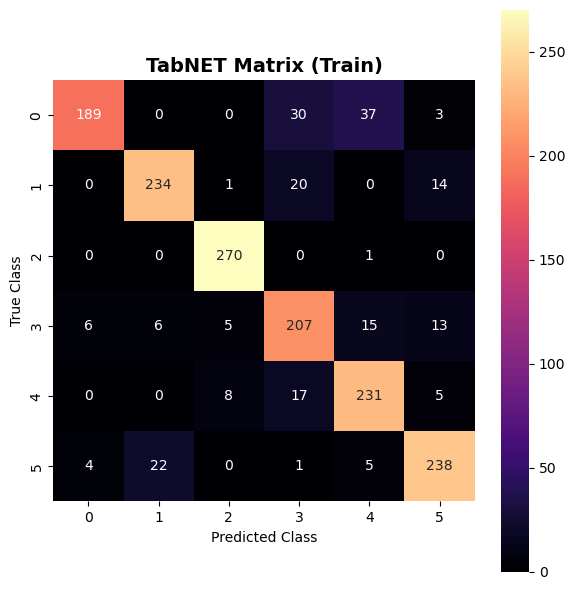

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicciones del mejor modelo sobre el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train_res_scaled)

# Matriz de confusión
cm = confusion_matrix(y_train_encoded, y_train_pred)

# Visualización tipo heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=True, square=True,
            xticklabels=np.unique(y_train_encoded),
            yticklabels=np.unique(y_train_encoded))

plt.title('TabNET Matrix (Train)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

## MÉTRICAS DEL MODELO TEST

In [36]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer

# Predicciones y probabilidades sobre el conjunto de prueba
test_pred = best_model.predict(X_test_scaled)
test_probs = best_model.predict_proba(X_test_scaled)

print("\n--- MÉTRICAS EN EL CONJUNTO DE PRUEBA ---")

print('Accuracy:', accuracy_score(y_test_encoded, test_pred), '→', accuracy_score(y_test_encoded, test_pred)*100, '%')
print('Precisión:', precision_score(y_test_encoded, test_pred, average='macro'), '→', precision_score(y_test_encoded, test_pred, average='macro')*100, '%')
print('Recall (sensibilidad):', recall_score(y_test_encoded, test_pred, average='macro'), '→', recall_score(y_test_encoded, test_pred, average='macro')*100, '%')
print('F1-score:', f1_score(y_test_encoded, test_pred, average='macro'), '→', f1_score(y_test_encoded, test_pred, average='macro')*100, '%')

# AUC
if len(np.unique(y_test_encoded)) == 2:
    roc_auc = roc_auc_score(y_test_encoded, test_probs[:, 1])
else:
    roc_auc = roc_auc_score(LabelBinarizer().fit_transform(y_test_encoded), test_probs, multi_class='ovr')
print('ROC AUC:', roc_auc, '→', roc_auc*100, '%')

# MCC
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test_encoded, test_pred), '→', matthews_corrcoef(y_test_encoded, test_pred)*100, '%')


--- MÉTRICAS EN EL CONJUNTO DE PRUEBA ---
Accuracy: 0.8608695652173913 → 86.08695652173914 %
Precisión: 0.781073478760046 → 78.1073478760046 %
Recall (sensibilidad): 0.8788068118269261 → 87.88068118269261 %
F1-score: 0.8136190318302386 → 81.36190318302387 %
ROC AUC: 0.973365258216914 → 97.3365258216914 %
Matthews Correlation Coefficient: 0.82331641302234 → 82.331641302234 %


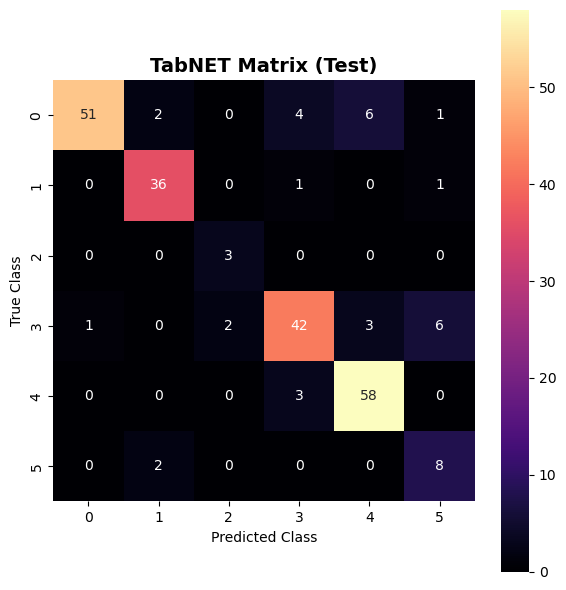

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test_encoded, test_pred)

# Visualización
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='magma', cbar=True, square=True,
            xticklabels=np.unique(y_test_encoded),
            yticklabels=np.unique(y_test_encoded))

plt.title('TabNET Matrix (Test)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()


## ROC CURVE (TRAIN)

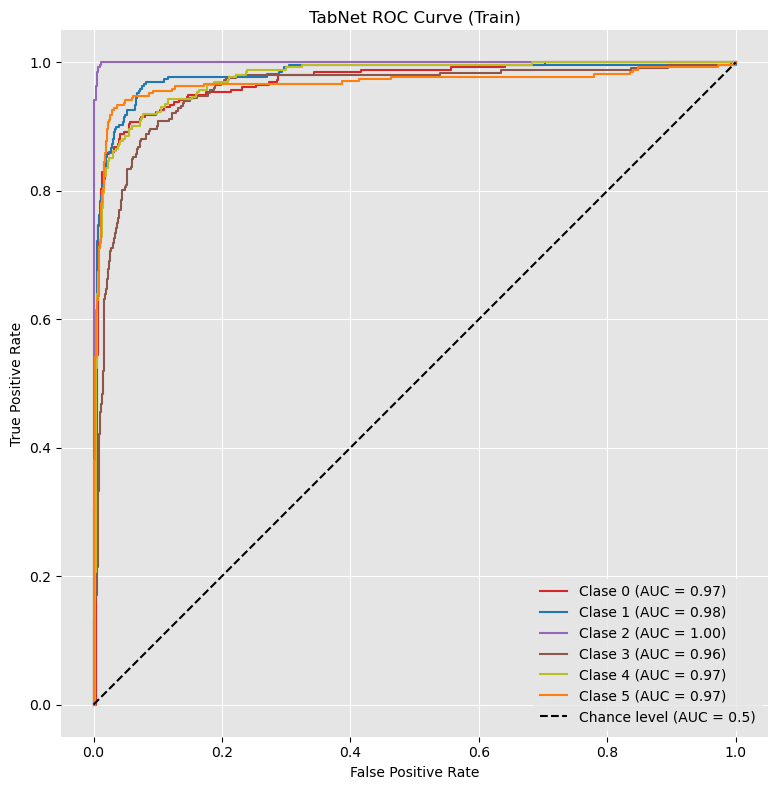

In [95]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Obtener probabilidades predichas por el mejor modelo TabNet
probs_train = best_model.predict_proba(X_train_res_scaled)

# Binarizar las etiquetas verdaderas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_encoded)

# Colores por clase (en el orden esperado)
colores = [
    '#d62728',  # Healthy
    '#1f77b4',  # Iron deficiency anemia
    '#9467bd',  # Macrocytic anemia
    '#8c564b',  # Normocytic hypochromic anemia
    '#bcbd22',  # Normocytic normochromic anemia
    '#ff7f0e',  # Other microcytic anemia
]

# Crear figura y ejes con fondo gris claro
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('#e5e5e5')

# Quitar bordes del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Curvas ROC por clase con colores definidos
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], probs_train[:, i])
    roc_auc = auc(fpr, tpr)
    class_label = lb.classes_[i]
    ax.plot(fpr, tpr, color=colores[i], label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

# Línea aleatoria
ax.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')

# Estética
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('TabNet ROC Curve (Train)')

# Leyenda con fondo gris claro
legend = ax.legend(loc='lower right', facecolor='#e5e5e5', frameon=True)
legend.get_frame().set_edgecolor('#e5e5e5')

# Cuadrícula blanca
ax.grid(True, color='white')
ax.axis('square')

plt.tight_layout()
plt.show()


## ROC CURVE (TEST)

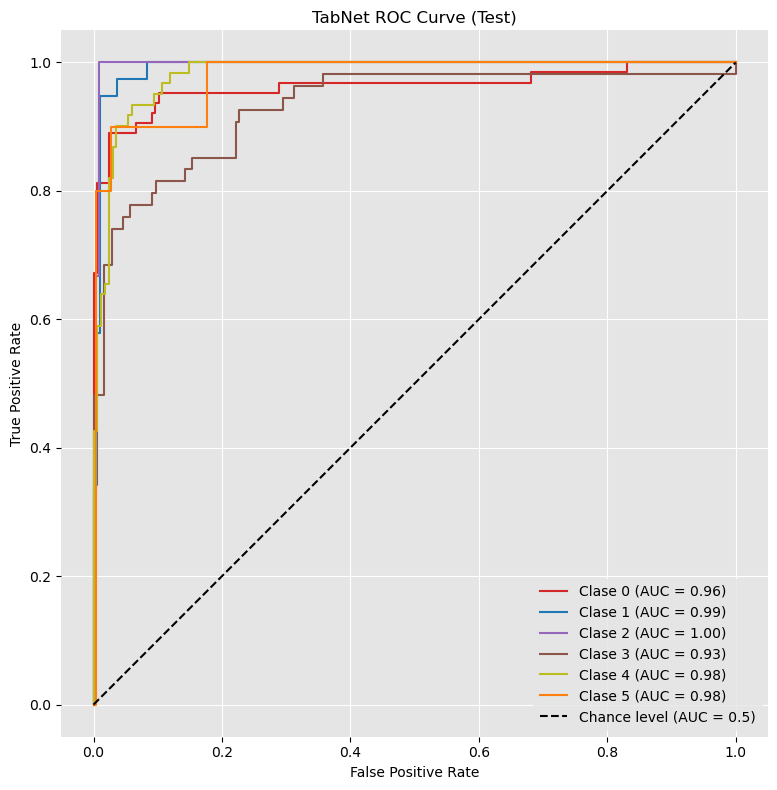

In [93]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener probabilidades del modelo en test
probs_test = best_model.predict_proba(X_test_scaled)

# Binarizar etiquetas
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_encoded)

# Definir colores por clase (en el orden correcto)
colores = [
    '#d62728',  # Healthy
    '#1f77b4',  # Iron deficiency anemia
    '#9467bd',  # Macrocytic anemia
    '#8c564b',  # Normocytic hypochromic anemia
    '#bcbd22',  # Normocytic normochromic anemia
    '#ff7f0e',  # Other microcytic anemia
]

# Crear figura
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('#e5e5e5')

# Quitar bordes
for spine in ax.spines.values():
    spine.set_visible(False)

# Dibujar curva ROC por clase con colores
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs_test[:, i])
    roc_auc = auc(fpr, tpr)
    class_label = lb.classes_[i]
    ax.plot(fpr, tpr, color=colores[i], label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

# Línea aleatoria
ax.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')

# Estética
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('TabNet ROC Curve (Test)')
legend = ax.legend(loc='lower right', facecolor='#e5e5e5', frameon=True)
legend.get_frame().set_edgecolor('#e5e5e5')
ax.grid(True, color='white')
ax.axis('square')
plt.tight_layout()
plt.show()
